In [2]:
import itertools
import pandas as pd


class Game:
    def __init__(self, teams):
        self.teams = teams
        self.num_teams = len(teams)
        self.win_rates = {team: 0 for team in teams}
        self.num_wins = {team: 0 for team in teams}
        self.total_games = {team: 0 for team in teams}
        self.matrix = []

################################################################################################################################

    def printMatrix(self):
        # Print the matrix for this outcome with exactly three decimal places
        print()
        print(f"Matrix for outcome: {outcome_bits}; (In a specific game, 0 means team1 wins and 1 means team2 wins; team1 is the team to the left)")
        print('Matrix columns: ')
        print('Match, Winner, Win_rate for team A,B,C,..., Predicted Winner')
        for row in game.matrix:
            formatted_row = ["{:.3f}".format(item) if isinstance(item, float) else item for item in row]
            print(formatted_row)

    def printUpsetRate(self, i, upset_rate_array):
        formatted_upset_rates = ["{:.3f}".format(rate) for rate in upset_rate_array]
        print("This game's Upset Rate is:", formatted_upset_rates[i])
        print("Historical Upset Rates are:", formatted_upset_rates)
        print("-------------------")  


################################################################################################################################
            
    def calculate_upset_rate(self):
        num_upsets = 0
        total_games = len(self.matrix)
        
        for row in self.matrix:
            if row[1] != row[-1]:  # Actual winner != Predicted winner
                num_upsets += 1
                
        return num_upsets / total_games
   
    def simulate_game_with_outcome(self, team1, team2, outcome):
        winner = team1 if outcome == 0 else team2
        # Make prediction based on win rates

        # if same win rates -> team1 predicted as "Favourite", and team2 "Underdog"
        # In the other word, if 2 teams have same win_rate, we predict team 1 to win
        # if two teams have different win_rate, we predict the high-win-rate-team to win 
        predicted_winner = team2 if self.win_rates[team2] > self.win_rates[team1] else team1

        
        # Update win counts and total games played for each team
        self.num_wins[winner] += 1
        self.total_games[team1] += 1
        self.total_games[team2] += 1
        # Update win rates
        self.win_rates[team1] = self.num_wins[team1] / self.total_games[team1]
        self.win_rates[team2] = self.num_wins[team2] / self.total_games[team2]
        # Add data to matrix
        row = [f"{team1} vs {team2}", winner]
        row.extend([self.win_rates[team] for team in self.teams])
        row.append(predicted_winner)
        
        self.matrix.append(row)
        
    def simulate_season_with_outcome(self, outcome_bits):
        i = 0
        for team1, team2 in itertools.combinations(self.teams, 2):
            self.simulate_game_with_outcome(team1, team2, outcome_bits[i])
            i += 1

################################################################################################################################
# client:


# Initialize the Game class
teams = ['A', 'B', 'C','D','E'] #input the teams as an string array. each string represent the team name, and thus representing a team 
game = Game(teams)

# Number of games for a season
num_games = len(list(itertools.combinations(teams, 2)))

# Walk through all possible outcomes (0 or 1 for each game, in a specific game, 0 means team1 wins and 1 means team2 wins )
all_possible_outcomes = itertools.product([0, 1], repeat=num_games)

# storing the upset rate of each possible outcome
upset_rate_array = []

# Iterate through all possible outcomes
game_index = 0
for outcome_bits in all_possible_outcomes:
    # Resetting the game statistics for new simulation
    game.win_rates = {team: 0 for team in teams}
    game.num_wins = {team: 0 for team in teams}
    game.total_games = {team: 0 for team in teams}
    game.matrix = []
    
    # Simulate the season with the current outcome
    game.simulate_season_with_outcome(outcome_bits)
    
    # Calculate the upset rate for this outcome
    upset_rate = game.calculate_upset_rate()
    upset_rate_array.append(upset_rate)

    # #normal print:
    # #print the instant detail of the season (updated at the end of each game)
    # game.printMatrix()
    # game.printUpsetRate(game_index,upset_rate_array)

    #print specific game:
    if(game_index == 999):
        #print the instant detail of the season (updated at the end of each game)
        game.printMatrix()
        game.printUpsetRate(game_index,upset_rate_array)

    # count the game index
    game_index+=1




print()
print('--finished--')


Matrix for outcome: (1, 1, 1, 1, 1, 0, 0, 1, 1, 1); (In a specific game, 0 means team1 wins and 1 means team2 wins; team1 is the team to the left)
Matrix columns: 
Match, Winner, Win_rate for team A,B,C,..., Predicted Winner
['A vs B', 'B', '0.000', '1.000', 0, 0, 0, 'A']
['A vs C', 'C', '0.000', '1.000', '1.000', 0, 0, 'A']
['A vs D', 'D', '0.000', '1.000', '1.000', '1.000', 0, 'A']
['A vs E', 'E', '0.000', '1.000', '1.000', '1.000', '1.000', 'A']
['B vs C', 'C', '0.000', '0.500', '1.000', '1.000', '1.000', 'B']
['B vs D', 'B', '0.000', '0.667', '1.000', '0.500', '1.000', 'D']
['B vs E', 'B', '0.000', '0.750', '1.000', '0.500', '0.500', 'E']
['C vs D', 'D', '0.000', '0.750', '0.667', '0.667', '0.500', 'C']
['C vs E', 'E', '0.000', '0.750', '0.500', '0.667', '0.667', 'C']
['D vs E', 'E', '0.000', '0.750', '0.500', '0.500', '0.750', 'D']
This game's Upset Rate is: 1.000
Historical Upset Rates are: ['0.000', '0.100', '0.200', '0.100', '0.100', '0.200', '0.200', '0.300', '0.300', '0.200'

In [5]:
# finding the maximum of the list of upset array, and the index for that specific game
max = 0
for i in range(len(upset_rate_array)):
    if(upset_rate_array[max]<upset_rate_array[i]):
        max = i

print(max)
print(upset_rate_array[max])

999
1.0


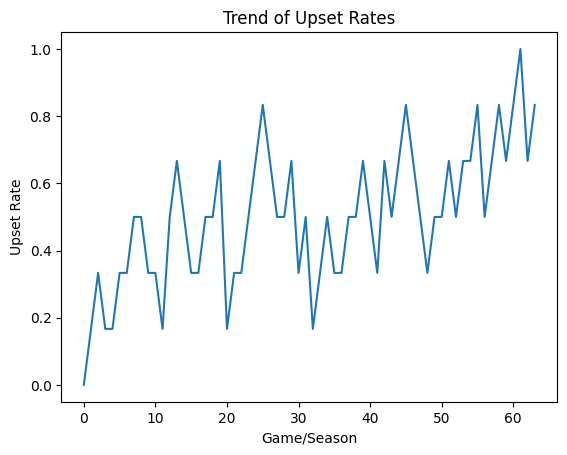

In [2]:
################################################################################################
#graph part#

import matplotlib.pyplot as plt

# Assuming upset_rates is sorted or represents some sequential data
# upset_rates = [...]



plt.plot(upset_rate_array)
plt.title('Trend of Upset Rates')
plt.xlabel('Game/Season')
plt.ylabel('Upset Rate')
plt.show()



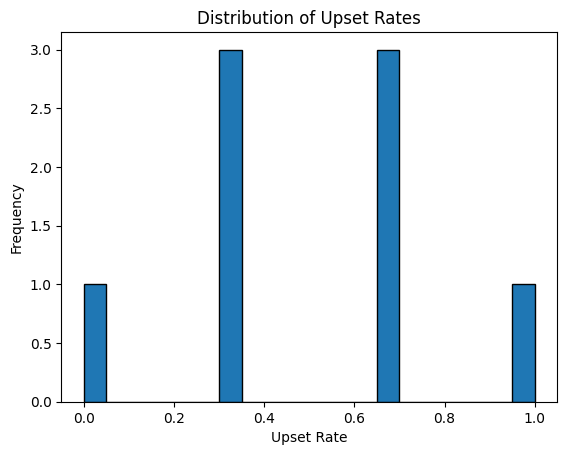

In [20]:

plt.hist(upset_rate_array, bins=20, edgecolor='black')
plt.title('Distribution of Upset Rates')
plt.xlabel('Upset Rate')
plt.ylabel('Frequency')
plt.show()

In [24]:
# !pip install matplotlib seaborn


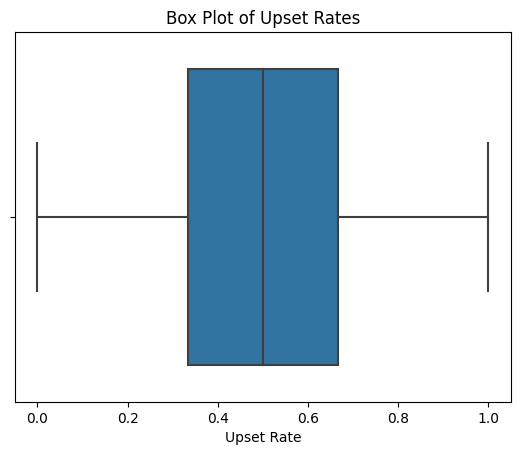

In [22]:

import seaborn as sns

sns.boxplot(x=upset_rate_array)
plt.title('Box Plot of Upset Rates')
plt.xlabel('Upset Rate')
plt.show()
